# Evaluation Project - 3
 
# Avacado Project

## Problem Statement:

   ### Avocado is a fruit consumed by people heavily in the United States. 

   ### Content
    This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

    The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail                   scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

    Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting                   includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The                         Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units                       (avocados) are sold in bags. 

    The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados                           (e.g. greenskins) are not included in this table.

    Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


    Inspiration /Label 

    The dataset can be seen in two angles to find the region and find the average price .

    Task: One of Classification and other of Regression

    Do both tasks in the same .ipynb file and submit at single file.

In [83]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
os.chdir("C:\github_repo\Files")
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [85]:
# checking the total rows and total columns
df.shape

(18249, 14)

In [86]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [87]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [88]:
#Finding out the column informations and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [89]:
#finding out the descriptiove statistics
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [90]:
#checking for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can notice from the above cell that data having huge amount of null values

<AxesSubplot:>

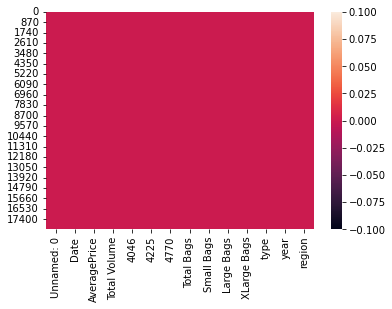

In [91]:
# checking null values using heatmap
sns.heatmap(df.isnull())

As we can see there are no null values in the data set.

In [92]:
df.dropna(inplace=True)
df.shape

(18249, 14)

After dropping all the null rows ,now we have 18249 rows and 14 columns only in the dataset.

In [94]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [98]:
df.drop(['Unnamed: 0','XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace=True)

In [99]:
df.shape

(18249, 9)

So after dropping all the unnecessary column 1517 rows and only 9 columns in dataset

In [100]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,2018.000000


In [101]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [102]:
df[['Date','Month','Year']] = df['Date'].str.split("-",expand = True)

In [103]:
# converting objects into integer datatype

df[['Date','Month','Year']] = df[['Date','Month','Year']].astype(int)

In [104]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Year
0,2015,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,27
1,2015,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,20
2,2015,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,13
3,2015,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,6
4,2015,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,29


In [105]:
df['Year'].value_counts()

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Year, dtype: int64

In [106]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [107]:
df.drop(['year'],axis=1, inplace=True)


In [108]:
df['type'].nunique()

2

As we can see we have 2 type so we are droping the column because all values are same


In [109]:
df.drop(['type'],axis=1, inplace=True)

In [110]:
df['region'].nunique()

54

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   region        18249 non-null  object 
 7   Month         18249 non-null  int32  
 8   Year          18249 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 1.7+ MB


No missing values in the dataset
There is no minimum value = 0
Now 8 numerical and 1 object columns in the dataset

# EDA

In [112]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,region,Month,Year
0,2015,1.33,64236.62,1036.74,54454.85,48.16,Albany,12,27
1,2015,1.35,54876.98,674.28,44638.81,58.33,Albany,12,20
2,2015,0.93,118220.22,794.70,109149.67,130.50,Albany,12,13
3,2015,1.08,78992.15,1132.00,71976.41,72.58,Albany,12,6
4,2015,1.28,51039.60,941.48,43838.39,75.78,Albany,11,29


In [113]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year
Date,1.000000,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.177050,0.004475
AveragePrice,0.093197,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.162409,0.027386
Total Volume,0.017193,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.024689,-0.009747
4046,0.003353,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.025803,-0.010159
4225,-0.009559,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.022108,-0.012393
4770,-0.036531,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.033424,-0.009009
Month,-0.177050,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,1.000000,0.010621
Year,0.004475,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,0.010621,1.000000


<AxesSubplot:>

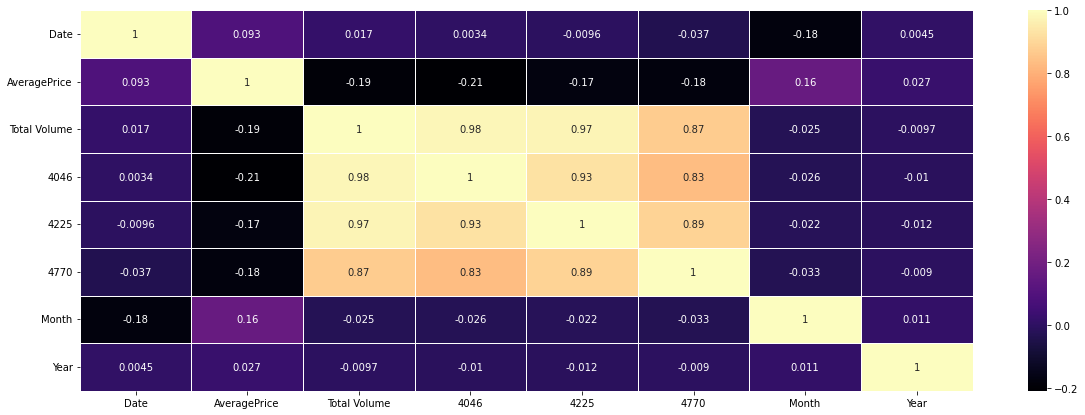

In [114]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='white',cmap='magma')

Observation:-

  - we don't see any column fairely correlated with Average price
  - Some of them are negatively correlated with data


<AxesSubplot:xlabel='Date', ylabel='Count'>

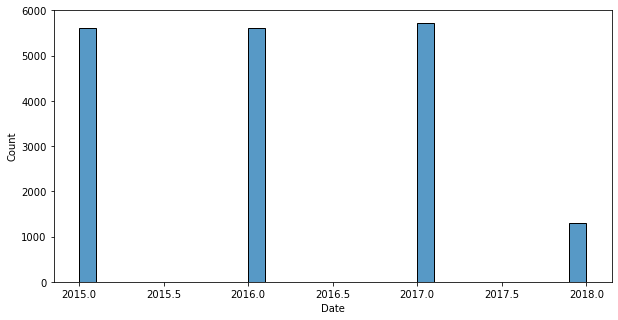

In [115]:
plt.figure(figsize=(10,5))
sns.histplot(df['Date'], bins=30)

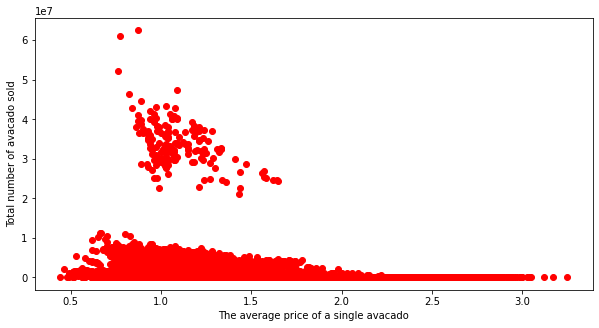

In [116]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['Total Volume'],c='Red')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of avacado sold')
plt.show()

max average price seems 0.8 to 1.2
having outliers as well

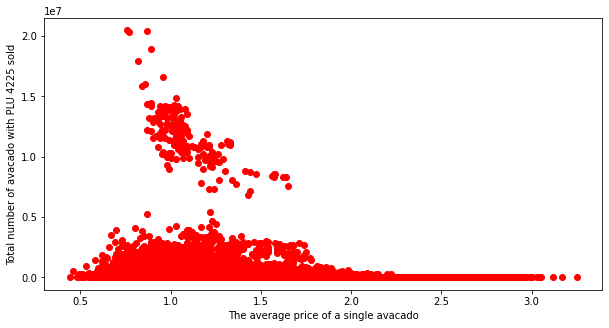

In [117]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4225'],c='Red')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of avacado with PLU 4225 sold')
plt.show()

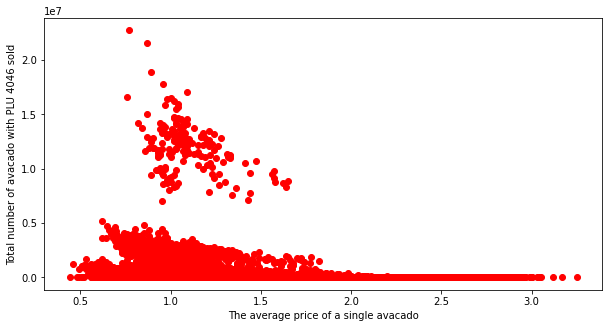

In [118]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4046'],c='Red')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of avacado with PLU 4046 sold')
plt.show()

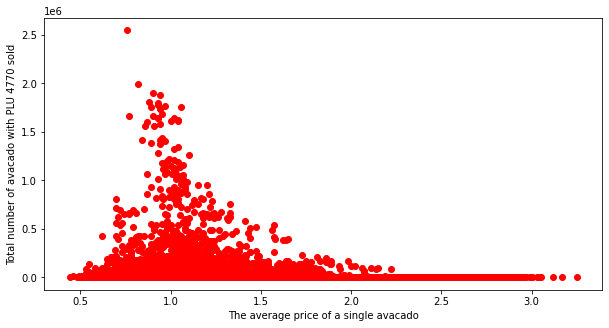

In [119]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4770'],c='Red')
plt.xlabel('The average price of a single avacado')
plt.ylabel('Total number of avacado with PLU 4770 sold')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

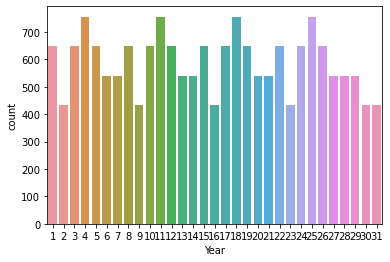

In [120]:
sns.countplot(x='Year',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

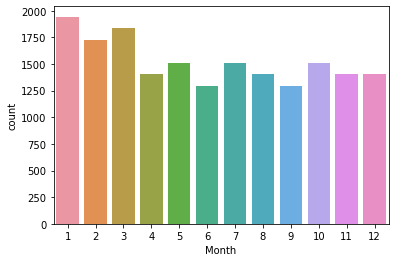

In [121]:
sns.countplot(x='Month',data=df)

Here we can see maximum avocado are sold in month 3,4 and 5 months are on average sale.

# Using LabelEncoder for Converting Categorical to Numerical


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   region        18249 non-null  object 
 7   Month         18249 non-null  int32  
 8   Year          18249 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 1.7+ MB


In [123]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   region        18249 non-null  int32  
 7   Month         18249 non-null  int32  
 8   Year          18249 non-null  int32  
dtypes: float64(5), int32(4)
memory usage: 1.6 MB


so after using LabelEncoder data set having only float42(5) and int32(4) numerical columns

# Plotting Histogram

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

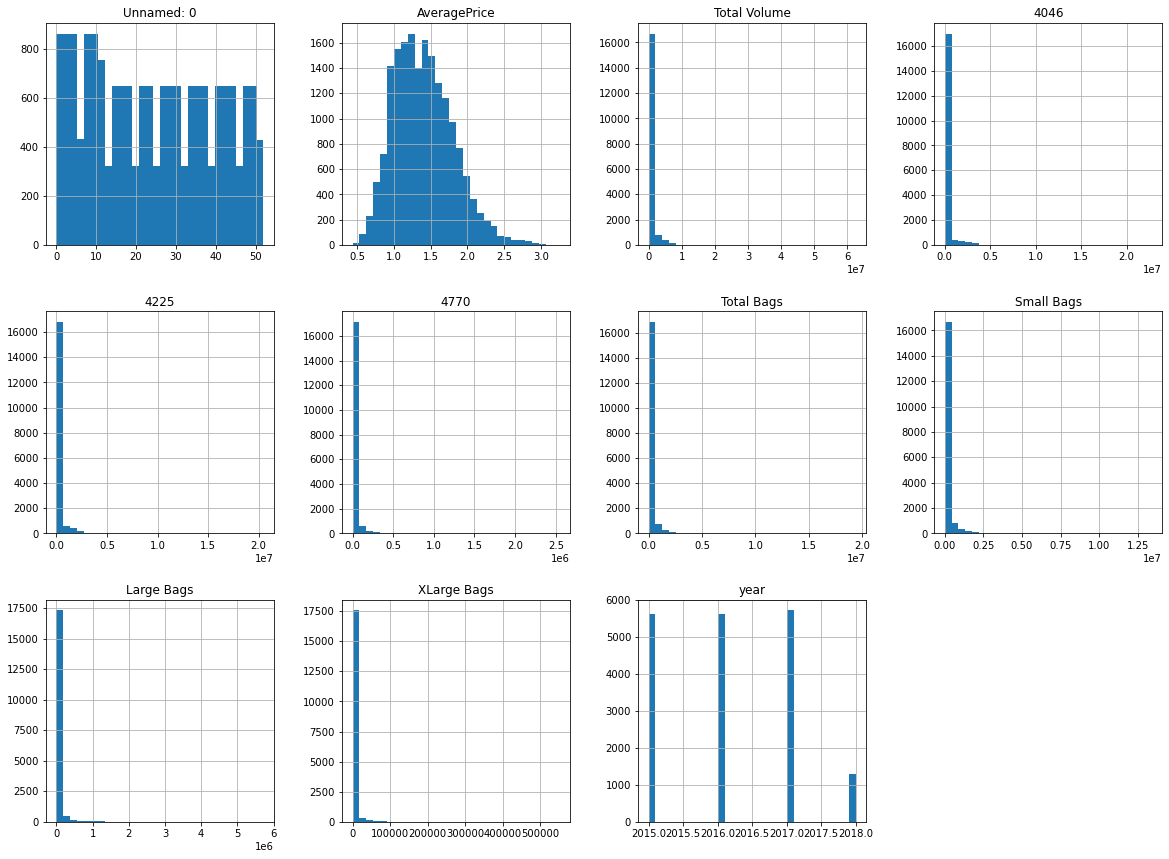

In [77]:
# Ploting histogram for univariate analysis and checking the normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4),bins = 30)

# Skewness Handling

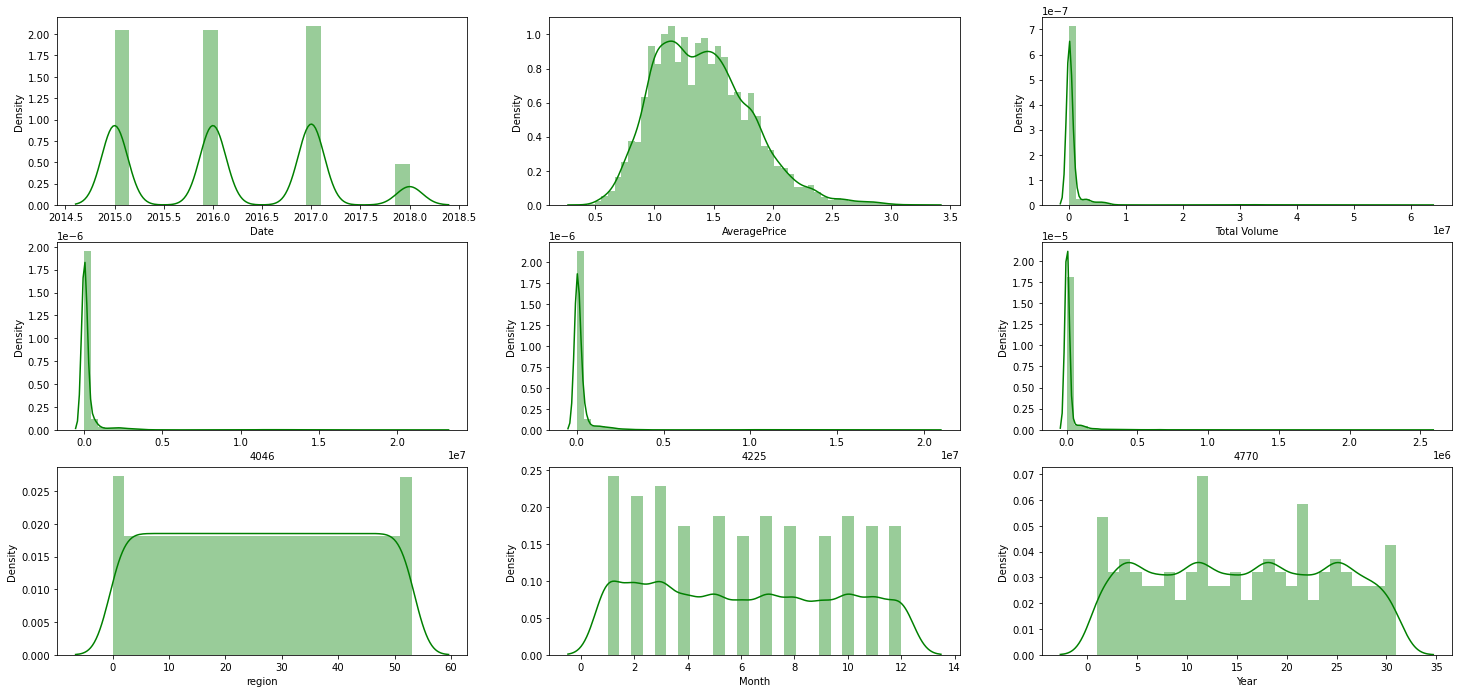

In [125]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [126]:
df.skew()

Date             0.215339
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
region           0.000030
Month            0.106617
Year             0.014310
dtype: float64

In [128]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [129]:
df.skew()

Date            0.215339
AveragePrice    0.580303
Total Volume    0.035774
4046           -0.006438
4225            0.017923
4770            0.029971
region          0.000030
Month           0.106617
Year            0.014310
dtype: float64

So here from the above cell we can see skewness removed from all columns.

# OUTLIERS HANDLING

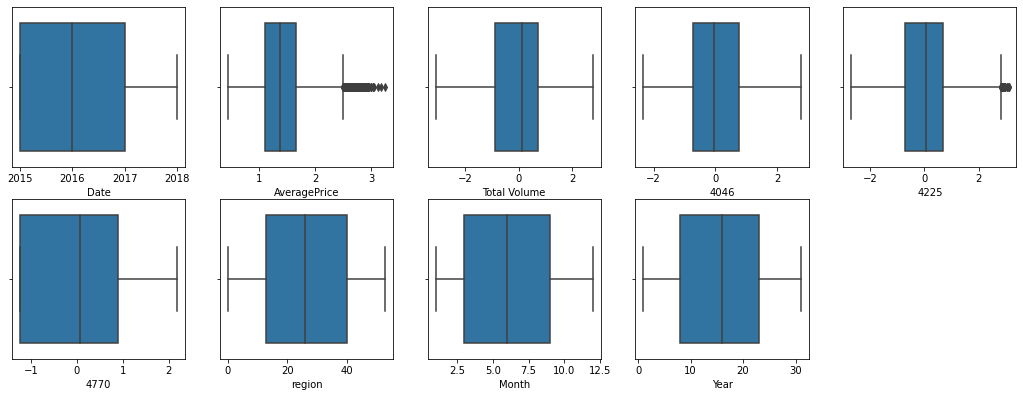

In [130]:
# Plotting the boxplot of each column to check the outliers
plt.figure(figsize=(18,10))
for i in enumerate(df):
    plt.subplot(3,5,i[0]+1)
    sns.boxplot(df[i[1]])

# ZSCORE METHOD

In [131]:
from scipy.stats import zscore

z = np.abs(zscore(df))
print(np.where(z>3))

(array([ 2699,  5493,  5506,  8366,  9097, 10381, 11320, 11321, 11323,
       11324, 11325, 11326, 11327, 11328, 11329, 11330, 11331, 11332,
       12821, 12823, 13033, 13035, 13037, 13038, 13395, 13657, 13661,
       14019, 14020, 14073, 14074, 14119, 14120, 14121, 14122, 14123,
       14124, 14125, 14126, 14128, 14129, 14177, 14385, 14699, 14701,
       14702, 14807, 14911, 14912, 14913, 14914, 14915, 14916, 14917,
       14918, 14919, 15124, 15125, 15127, 15128, 15129, 15130, 15510,
       15511, 15667, 15668, 15671, 15673, 15674, 15814, 15871, 16024,
       16050, 16055, 16395, 16399, 16421, 16660, 16661, 16662, 16663,
       16664, 16665, 16666, 16667, 16714, 16715, 16717, 16718, 16719,
       16720, 16721, 16734, 16737, 16738, 16985, 16986, 16994, 16995,
       16996, 16997, 16998, 16999, 17000, 17007, 17008, 17009, 17010,
       17015, 17017, 17031, 17032, 17033, 17034, 17035, 17036, 17037,
       17038, 17039, 17040, 17047, 17244, 17245, 17246, 17247, 17248,
       17249, 17250

In [132]:
df_1 = df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (18249, 9)
After removing outliers:: (18112, 9)


# IQR METHOD

In [133]:
from scipy import stats

IQR = stats.iqr(df)
IQR


14.762381013808014

In [134]:
Q1 = df.quantile()
Q3 = df.quantile()
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(15210, 9)


In [135]:
df = df_out

# Dividing Data into X and Y

In [136]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [137]:
x.shape

(15210, 8)

In [138]:
y.shape

(15210,)

# Scaling X values

In [139]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [140]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [141]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,15210.000000,15210.000000,15210.000000,15210.000000,15210.000000,15210.000000,15210.000000,15210.000000
mean,0.382643,0.597063,0.515813,0.529675,0.387084,0.500000,0.470683,0.488757
std,0.313316,0.182577,0.210197,0.188919,0.311027,0.295173,0.321284,0.292540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.431865,0.360375,0.392213,0.000000,0.250000,0.181818,0.233333
50%,0.333333,0.627298,0.506338,0.539894,0.421537,0.500000,0.454545,0.500000
75%,0.666667,0.730759,0.681493,0.670449,0.669152,0.750000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the Data for Training and Testing

In [142]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Let's find the best random state in below cell

In [143]:
from sklearn.linear_model import LinearRegression


LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.46887519680087564
At random state 0, The test accuracy is :-0.43625379400926845


At random state 1, The training accuracy is :-0.4583327657192713
At random state 1, The test accuracy is :-0.4744605553748308


At random state 2, The training accuracy is :-0.46074520585191037
At random state 2, The test accuracy is :-0.46600104217530025


At random state 3, The training accuracy is :-0.46085741980931716
At random state 3, The test accuracy is :-0.46565020137253266


At random state 4, The training accuracy is :-0.46303087844473745
At random state 4, The test accuracy is :-0.4579764520429982


At random state 5, The training accuracy is :-0.4612702617226986
At random state 5, The test accuracy is :-0.4644032440092777


At random state 6, The training accuracy is :-0.45881773340927723
At random state 6, The test accuracy is :-0.4728587104098708


At random state 7, The training accuracy is :-0.46446309464656754
At random state 7, The test ac

In [144]:
# spliting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=24)

In [145]:
x_train.shape

(11863, 8)

In [146]:
y_train.shape

(11863,)

In [147]:
x_test.shape

(3347, 8)

In [148]:
y_test.shape

(3347,)

# Model Building

# Linear Regression

In [149]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.46133510665029764


In [150]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.08797388451310505
MAE: 0.23199334685263728
r2_score: -0.11678274701575542


# Ridge

In [151]:
from sklearn.linear_model import Ridge

R = Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.46108940255333886


In [152]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.0879605324835946
MAE: 0.23177082034804045
r2_score: -0.14092544559902276


# SVR

# SVR(kernel='linear')


In [153]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.45769833859203746


In [154]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.08798640729421077
MAE: 0.23038507314295792
r2_score: -0.1481324146521399


# SVR(kernel='poly')


In [155]:
svr_p = SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.540433691649181


In [156]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.07743046120981359
MAE: 0.2115063650729805
r2_score: 0.08716031890660592


# SVR(kernel='rbf')


In [157]:
svr_r = SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.702534251392713


In [158]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.05134719778671795
MAE: 0.16600948821464007
r2_score: 0.4999520483443418


# Random Forest Regressor


In [159]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9855640208551584


In [160]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.01817599222288617
MAE: 0.09249014042426056
r2_score: 0.8604766095184276


# Decision Tree Regressor


In [161]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [162]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.039016731401254855
MAE: 0.12865252464893934
r2_score: 0.7583238573174038


# Gradient Boosting Regressor


In [163]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7466876087346308


In [164]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.0439251905109065
MAE: 0.1550107916100003
r2_score: 0.5398900414197387


# Cross Validation


In [165]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),
             GradientBoostingRegressor(),]
          
          
names = ['LR', 'R', 'svr','svr_p','svr_r','RF','DTR','GBR']
          
for model,name in zip(models,names):
          score = rmse_cv(model,x,y)
          print("{}  : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR  : 0.093954, 0.041413
R  : 0.094032, 0.041399
svr  : 0.094817, 0.043686
svr_p  : 0.120616, 0.047901
svr_r  : 0.116702, 0.063869
RF  : 0.079302, 0.043442
DTR  : 0.138094, 0.057164
GBR  : 0.063192, 0.031426


According to all metrics score selecting the Random Forest Regressor a final model for hyper tuning.

# HYPER PERAMETER TUNING


# GridSearchCV


In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100,200],
      'criterion':['mse','mae'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [174]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [169]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [170]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.017953965855990437
MAE: 0.09197077980280849
r2_score: 0.8629332020120382


# With Best Parameters


In [175]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100],
      'criterion':['mse'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [176]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [177]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [178]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.018217208279055867
MAE: 0.09255270391395279
r2_score: 0.8605306826582841


In [179]:
RF_grid_PRED

array([1.3499, 1.9309, 1.5821, ..., 1.0727, 0.975 , 2.2318])

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

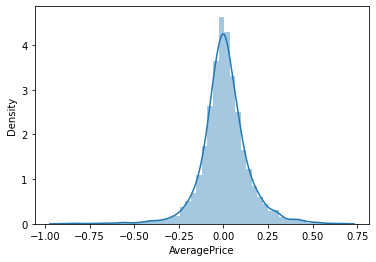

In [180]:
sns.distplot(RF_grid_PRED-y_test)

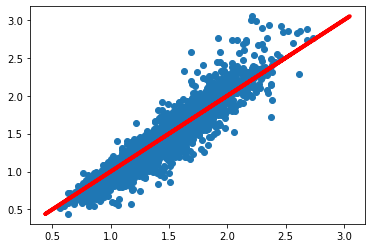

In [181]:
plt.scatter(RF_grid_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# OBSERVATION

So after applying GridSearchCV we can see that the Random Forest as the Best Model.